In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

import numpy as np
π = np.pi

backend = BasicAer.get_backend('qasm_simulator')
backend_statevector = BasicAer.get_backend('statevector_simulator')

q, c = QuantumRegister(1), ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

# Quantum states

A classical coin is a two-level system: it is either heads or tails. At a first look a quantum state is a probability distribution, and the simplest case is a two-level state, which we call a qubit:

$$
|\psi\rangle = \begin{bmatrix}
    a_0 \\
    a_1 \\
\end{bmatrix}
$$

where the components of the quantum state vector $a_0, a_1\in \mathbb{C}$ (*probability amplitudes*) are complex valued.  The key difference to classical probability distributions is the $l_2$ normalization constraint:

$$
\sqrt{|a_0|^2+|a_1|^2}=1.
$$


Let us introduce two special qubits, corresponding to the canonical basis vectors in two dimensions: $|0\rangle$ and $|1\rangle$.

$$
|0\rangle = \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}, \,\,\, |1\rangle = \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}.
$$

This basis is also called the computational basis in quantum computing.  We can expand an arbitrary qubit state in this basis:

$$
|\psi\rangle = \begin{bmatrix}
    a_0 \\
    a_1 \\
\end{bmatrix}=a_0\begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix} + 
a_1\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}=
a_0|0\rangle+a_1|1\rangle.
$$

This expansion in a basis is called a superposition. If we sample the qubit state, we obtain the outcome 0 with probability $|a_0|^2$, and 1 with probability $|a_1|^2$. This is known as the Born rule; you will learn more about measurements and this rule in a subsequent notebook.

To understand the possible quantum states, we use the **Bloch sphere visualization**. Since the probability amplitudes are complex and there are two of them for a single qubit, this would require a four-dimensional space. Now since the vectors are normalized, this removes a degree of freedom, allowing a three-dimensional representation with an appropriate embedding. This embedding is the Bloch sphere. It is slightly different than an ordinary sphere in three dimensions: we identify the north pole with the state $|0\rangle$, and the south pole with $|1\rangle$. In other words, two orthogonal vectors appear as if they were on the same axis -- the axis Z. The computational basis is just one basis: the axes X and Y represent two other bases. Any point on the surface of this sphere is a valid quantum state. This is also true the other way around: every pure quantum state is a point on the Bloch sphere. Here it 'pure' is an important technical term and it essentially means that the state is described by a ket (column vector). Later in the course we will see other states called mix states that are not described by a ket (you will see later that these are inside the Bloch sphere).

To make it less abstract, let's plot our $|0\rangle$ on the Bloch sphere:

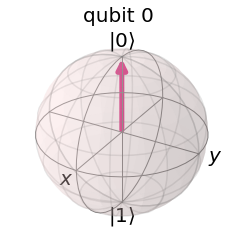

In [4]:
circuit = QuantumCircuit(q, c)
circuit.iden(q[0])
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

Let us pick another point on the Bloch sphere, that is, another distribution. Let's transform the state $|0\rangle$ to $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. This corresponds to the unbiased coin, since we will get 0 with probability $|\frac{1}{\sqrt{2}}|^2=1/2$, and the other way around. There are many ways to do this transformation. We pick a rotation around the Y axis by $\pi/2$, which corresponds to the matrix $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -1\\1 & 1\end{bmatrix}$.

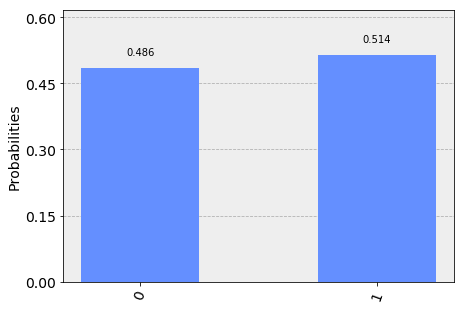

In [5]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=1000)
plot_histogram(job.result().get_counts(circuit))

To get an intuition why it is called a rotation around the Y axis, let's plot it on the Bloch sphere:

state vector is [0.70710678+0.j 0.70710678+0.j]


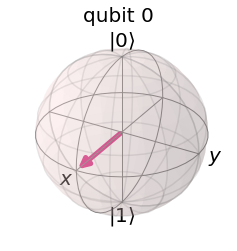

In [6]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0])
job = execute(circuit, backend_statevector)
stateVector = job.result().get_statevector(circuit)
print('state vector is %s' % stateVector)
plot_bloch_multivector(stateVector)

It does exactly what it says: it rotates from the north pole of the Bloch sphere.  Let us now apply an additional $π/8$ rotation around the Z axis:

state vector is [ 0.70710678+0.j -0.70710678+0.j]


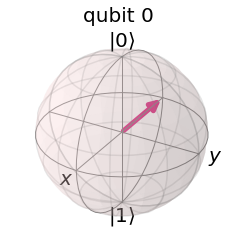

In [7]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0])
circuit.rz(π, q[0])
job = execute(circuit, backend_statevector)
stateVector = job.result().get_statevector(circuit)
print('state vector is %s' % stateVector)
plot_bloch_multivector(stateVector)

Notice that this state vector still lies in the XY plane.  Therefore, it should be indistinguishable from the previous state if one were to only look at measurement statistics:

In [8]:
a0, a1 = stateVector[0], stateVector[1]

prob0 = a0.real ** 2 + a0.imag ** 2
prob1 = a1.real ** 2 + a1.imag ** 2

print(stateVector)
print('prob(|0>) = %.4f ; prob(|1>) = %.4f' % (prob0, prob1))


[ 0.70710678+0.j -0.70710678+0.j]
prob(|0>) = 0.5000 ; prob(|1>) = 0.5000


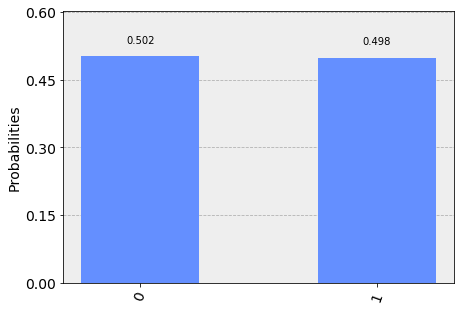

In [9]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0])
circuit.rz(π/8, q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=1000)
plot_histogram(job.result().get_counts(circuit))

Why is interesting to have complex probability amplitudes instead of non-negative real numbers? To get some insight, take a look what happens if we apply the same rotation to $|1\rangle$. To achieve this, first we flip $|0\rangle$ to $|1\rangle$ by applying a NOT gate (denoted by X in quantum computing) and then the rotation.

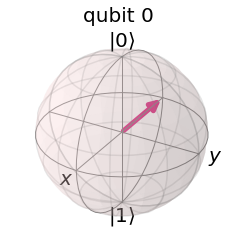

In [10]:
circuit = QuantumCircuit(q, c)
circuit.x(q[0])
circuit.ry(π/2, q[0])
#circuit.rz(π/2, q[0])
job = execute(circuit, backend_statevector)
stateVector = job.result().get_statevector(circuit)
plot_bloch_multivector(stateVector)

You can verify that the result is $\frac{1}{\sqrt{2}}(-|0\rangle + |1\rangle)$. That is, the exact same state as before, except that the first term got a minus sign: it is a negative probability amplitude. Even though this state no longer lies in the XY plane, the difference cannot be observed from the statistics:

In [11]:
stateVector
#plot_histogram(job.result().get_counts(circuit))

array([-0.70710678+0.j,  0.70710678+0.j])

# More qubits and entanglement

We have already seen that quantum states are probability distributions normed to 1 in the $l_2$ norm and we got a first peek at interference. If we introduce more qubits, we see another crucial quantum effect emerging. To do that, we first have to define how we write down the column vector for describing two qubits. We use a tensor product, which, in the case of qubits, is equivalent to the Kronecker product. Given two qubits, $|\psi\rangle=\begin{bmatrix}a_0\\a_1\end{bmatrix}$ and $|\psi'\rangle=\begin{bmatrix}b_0\\b_1\end{bmatrix}$, their product is $|\psi\rangle\otimes|\psi'\rangle=\begin{bmatrix}a_0b_0\\ a_0b_1\\ a_1b_0\\ a_1b_1\end{bmatrix}$. Imagine that you have two registers $q_0$ and $q_1$, each can hold a qubit, and both qubits are in the state $|0\rangle$. Then this composite state would be described by according to this product rule as follows:

This is the $|0\rangle\otimes|0\rangle$ state, which we often abbreviate as $|00\rangle$. The states $|01\rangle$, $|10\rangle$, and $|11\rangle$ are defined analogously, and the four of them give the canonical basis of the four dimensional complex space, $\mathbb{C}^2\otimes\mathbb{C}^2$.

Now comes the interesting and counter-intuitive part. In machine learning, we also work we high-dimensional spaces, but we never construct it as a tensor product: it is typically $\mathbb{R}^d$ for some dimension $d$. The interesting part of writing the high-dimensional space as a tensor product is that not all vectors in can be written as a product of vectors in the component space.

Take the following state: $|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$. This vector is clearly in $\mathbb{C}^2\otimes\mathbb{C}^2$, since it is a linear combination of two of the basis vector in this space. Yet, it cannot be written as $|\psi\rangle\otimes|\psi'\rangle$ for some $|\psi\rangle$, $|\psi'\rangle\in\mathbb{C}^2$.

To see this, assume that it can be written in this form. Then

$$
|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle) = \begin{bmatrix}a_0b_0\\ a_0b_1\\ a_1b_0\\ a_1b_1\end{bmatrix} = a_0b_0|00\rangle + a_0b_1|01\rangle + a_1b_0|10\rangle + a_1b_1|11\rangle.
$$

$|01\rangle$ and $|10\rangle$ do not appear on the left-hand side, so their coefficients must be zero: $a_1b_0=0$ and $a_0b_1=0$. This leads to a contradiction, since $a_1$ cannot be zero ($a_1b_1=1$), so $b_0$ must be zero, but $a_0b_0=1$. Therefore $|\phi^+\rangle$ cannot be written as a product.

**States that cannot be written as a product are called entangled states**. This is the mathematical form of describing a phenomenon of strong correlations between random variables that exceed what is possible classically. Entanglement plays a central role in countless quantum algorithms. A simple example is [quantum teleportation](https://en.wikipedia.org/wiki/Quantum_teleportation). We will also see its applications in quantum machine learning protocols.

We will have a closer look at entanglement in a subsequent notebook on measurements, but as a teaser, let us look at the measurement statistics of the $|\phi^+\rangle$ state. The explanation of the circuit preparing it will also come in a subsequent notebook.

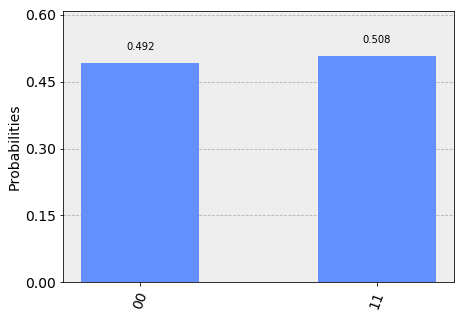

In [12]:
q, c = QuantumRegister(2), ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q, c)
job = execute(circuit, backend, shots=1000)
plot_histogram(job.result().get_counts(circuit))

Notice that $|01\rangle$ or $|10\rangle$ never appear in the measurement statistics (thanks to the world of perfect simulations).